In [1]:
import numpy as np
import McNeuron
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline
#np.random.seed(0)
L = McNeuron.visualize.get_all_path("/Volumes/Arch/Projects/Computational Anatomy/neuron_nmo/")
Feature_neuron = McNeuron.Neuron(file_format = 'swc', input_file=L[1500])
#inter2 = Inter2.subsample_given_n_node(400)
feature_neuron = Feature_neuron.subsample_given_n_node(600)

Start_neuron = McNeuron.Neuron(file_format = 'swc', input_file=L[1020])
Start_neuron.location *= 9
Start_neuron.set_nodes_values()
Start_neuron = McNeuron.Neuron(file_format = 'only list of nodes', input_file = deepcopy(Start_neuron.nodes_list))
start_neuron = Start_neuron.subsample_given_n_node(600)

/Users/RoozbehFarhoudi/anaconda/lib/python2.7/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


In [2]:
#p1 = McNeuron.visualize.plot_2D(start_neuron, dpi = 120, size = 5, show_width= False,  background = .01,line_width=2)
#p2 = McNeuron.visualize.plot_2D(feature_neuron, dpi = 120, size = 5, show_width= False,  background = .01,line_width=2)

In [142]:
from numpy import mean,cov,double,cumsum,dot,linalg,array,rank
from pylab import plot,subplot,axis,stem,show,figure, Normalize
import neuron
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import pylab as pl
import matplotlib
from matplotlib import collections  as mc
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
def plot_2D(neuron, background = 1,
            show_width = False,
            show_depth = False,
            size = 5,
            dpi = 80,
            line_width = 1,
            show_soma = False,
            give_image = False,
            red_after = False,
            node_red = 0,
            translation = (0,0),
            scale_on = False,
            scale = (1,1),
            save = []):
    depth = neuron.location[2,:]
    p = neuron.location[0:2,:]
    if scale_on:
        p[0,:] = scale[0] * (p[0,:]-min(p[0,:]))/(max(p[0,:]) - min(p[0,:]) )
        p[1,:] = scale[1] * (p[1,:]-min(p[1,:]))/(max(p[1,:]) - min(p[1,:]) )
    widths= neuron.diameter
    #widths[0:3] = 0
    m = min(depth)
    M = max(depth)
    depth =  background * ((depth - m)/(M-m))
    colors = []
    lines = []
    patches = []

    for i in range(neuron.n_soma):
        x1 = neuron.location[0,i] + translation[0]
        y1 = neuron.location[1,i] + translation[1]
        r = widths[i]
        circle = Circle((x1, y1), r, color = str(depth[i]), ec = 'none',fc = 'none')
        patches.append(circle)

    pa = PatchCollection(patches, cmap=matplotlib.cm.gray)
    pa.set_array(depth[0]*np.zeros(neuron.n_soma))

    for i in range(len(neuron.nodes_list)):
        colors.append(str(depth[i]))
        j = neuron.parent_index[i]
        lines.append([(p[0,i] + translation[0],p[1,i] + translation[1]),(p[0,j] + translation[0],p[1,j] + translation[1])])
        
    if(show_width):
        if(show_depth):
            lc = mc.LineCollection(lines, colors=colors, linewidths = line_width*widths)
        else:
            lc = mc.LineCollection(lines, linewidths = line_width*widths)
    else:
        if(show_depth):
            lc = mc.LineCollection(lines, colors=colors, linewidths = line_width)
        else:
            lc = mc.LineCollection(lines, linewidths = line_width, color = 'k')

    if(give_image):     
        if(red_after):
            line1 = []
            line2 = []
            (I1,) = np.where(~np.isnan(neuron.connection[:,node_red]))
            (I2,) = np.where(np.isnan(neuron.connection[:,node_red]))
            for i in I1:
                j = neuron.parent_index[i]
                line1.append([(p[0,i],p[1,i]),(p[0,j],p[1,j])])
                lc1 = mc.LineCollection(line1, linewidths = 2*line_width, color = 'r')
            for i in I2:
                j = neuron.parent_index[i]
                line2.append([(p[0,i],p[1,i]),(p[0,j],p[1,j])])
                lc2 = mc.LineCollection(line2, linewidths = line_width, color = 'k')  
            return (lc1, lc2, (min(p[0,:]),max(p[0,:])), (min(p[1,:]),max(p[1,:])))
        else:
            return (lc, (min(p[0,:]),max(p[0,:])), (min(p[1,:]),max(p[1,:])))
    else:
        fig, ax = plt.subplots()
        ax.add_collection(lc)
        if(show_soma):
            ax.add_collection(pa)
        fig.set_size_inches([size + 1, size + 1])
        fig.set_dpi(dpi)
        plt.axis('off')
        plt.xlim((min(p[0,:]),max(p[0,:])))
        plt.ylim((min(p[1,:]),max(p[1,:])))
        plt.draw()
        if(len(save)!=0):
            plt.savefig(save, format = "eps")


In [4]:
def get_features(neuron_data, all_range):
    n = len(neuron_data)
    set_feature = {}
    K = all_range.keys()
    for name in K:
        F = np.zeros([n, all_range[name].shape[0] -1])
        for i in range(n):
            neuron = neuron_data[i]
            a = neuron.features[name]
            b = np.histogram(a[~np.isnan(a)],bins = all_range[name])
            F[i,:] = b[0]
        set_feature[name] = F
    
    return set_feature

In [35]:
N = []
L = McNeuron.visualize.get_all_path("/Volumes/Arch/Projects/Computational Anatomy/neuron_nmo/")
#L = McNeuron.visualize.get_all_path("/Users/RoozbehFarhoudi/Documents/Repos/Generative-Models-of-Neuron-Morphology/Data/Interneuron/allen cell types/CNG version/")
for i in range(100):
    Feature_neuron = McNeuron.Neuron(file_format = 'swc', input_file=L[2710+i])
    N.append(Feature_neuron.subsample_given_n_node(600))
    print i
# plot_2D(feature_neuron, dpi = 120, size = 5, show_width= False, 
#         save = "/Volumes/Arch/Dropbox/MCMC paper/pyramidal_chen_09",
#         show_depth = True, background = .01,line_width=2,
        
#        )

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [136]:
all_range = {}
all_range['global_angle'] = np.arange(0,np.pi,np.pi/60)
all_range['local_angle'] = np.arange(0,np.pi,np.pi/60)
all_range['ratio_euclidian_neuronal'] = np.arange(1,1.5,.01)
all_range['distance_from_parent'] = np.arange(3,27,1)
all_range['distance_from_root'] = np.arange(1,300,5)
all_range['branch_angle'] = np.arange(0,np.pi,np.pi/40)
all_range['curvature'] = np.arange(0,np.pi,np.pi/20)
all_range['euclidian_important'] = np.arange(0,60,1)
all_range['neural_important'] = np.arange(0,200,3)
all_range['ratio_neural_euclidian_important'] = np.arange(1,1.5,.01)
all_range['branch_angle_segment'] = np.arange(0,np.pi,np.pi/60)
xlabel = {}
xlabel['global_angle'] = 'angle (radian)'
xlabel['local_angle'] = 'angle (radian)'
xlabel['ratio_euclidian_neuronal'] = 'ratio'
xlabel['distance_from_parent'] = 'distance (nm)'
xlabel['distance_from_root'] = 'distance (nm)'
xlabel['branch_angle'] = 'angle (radian)'
xlabel['curvature'] = 'angle (radian)'
xlabel['euclidian_important'] = 'distance (nm)'
xlabel['neural_important'] = 'distance (nm)'
xlabel['ratio_neural_euclidian_important'] = 'ratio'
xlabel['branch_angle_segment'] = 'angle (radian)'
ylabel = {}
ylabel['global_angle'] = 'density'
ylabel['local_angle'] = 'density'
ylabel['ratio_euclidian_neuronal'] = 'density'
ylabel['distance_from_parent'] = 'density'
ylabel['distance_from_root'] = 'density'
ylabel['branch_angle'] = 'density'
ylabel['curvature'] = 'density'
ylabel['euclidian_important'] = 'density'
ylabel['neural_important'] = 'density'
ylabel['ratio_neural_euclidian_important'] = 'density'
ylabel['branch_angle_segment'] = 'density'
title = {}
title['global_angle'] = 'Histogram of Global Angles'
title['local_angle'] = 'Histogram of Local Angles'
title['ratio_euclidian_neuronal'] = 'Histogram of Euclidian over Neural Distance'
title['distance_from_parent'] = 'Histogram of Distance from Parent of Nodes'
title['distance_from_root'] = 'Histogram of Distance from Root of Nodes'
title['branch_angle'] = 'Histogram of Branching nodes'
title['curvature'] = 'Histogram of Curvature'
title['euclidian_important'] = 'Histogram of Euclidan Length of Segments'
title['neural_important'] = 'Histogram of Neural Length of Segment'
title['ratio_neural_euclidian_important'] = 'Histogram of Euclidian over Neural Distance of Segments'
title['branch_angle_segment'] = 'Histogram of Angles at Branching Segments'

In [52]:
feature = get_features(N,all_range)

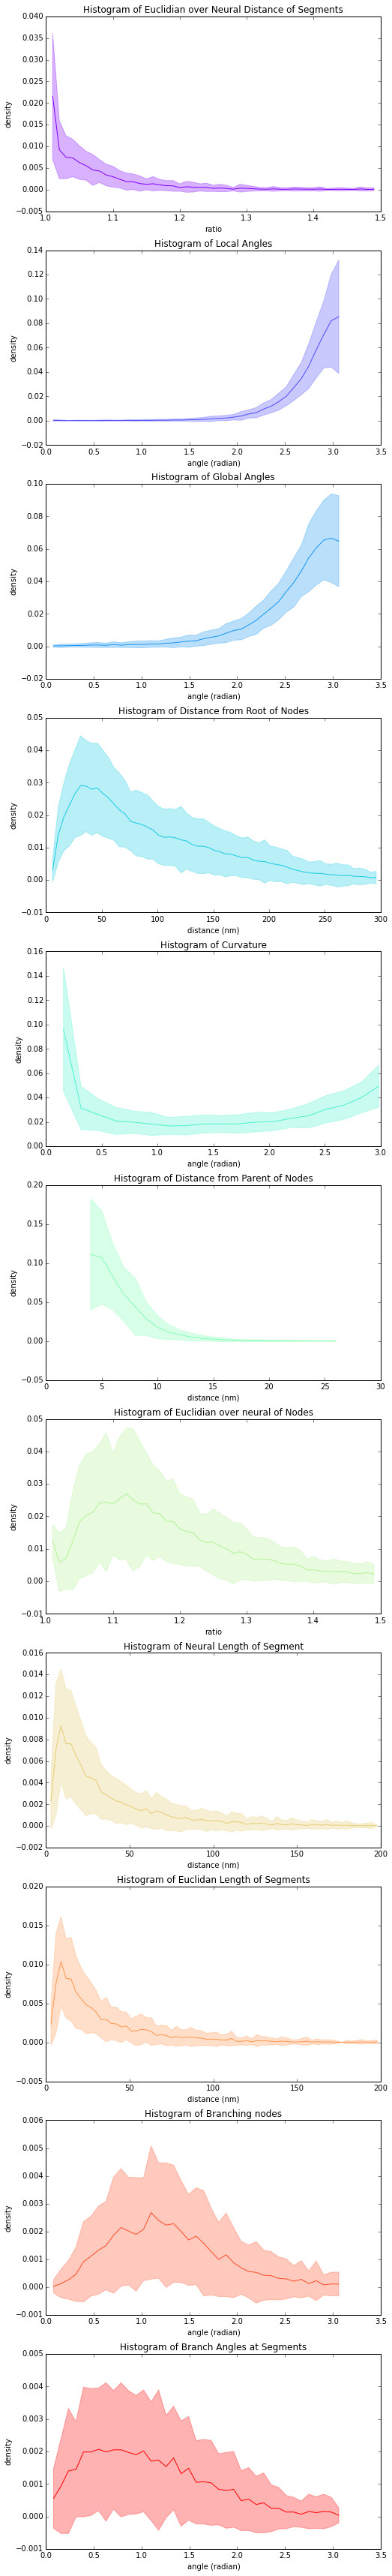

In [38]:
from matplotlib.pyplot import cm 
I = feature.keys()
c=cm.rainbow(np.linspace(0,1,len(I)))
f, axs = plt.subplots(len(I),1)
axs = axs.reshape(len(I))
f.set_figheight(5.5*len(I))
f.set_figwidth(8)
f.set_dpi(400)
for i in range(len(I)):
    d = feature[I[i]]
    m = np.mean(d/600,axis = 0)
    std = np.std(d/600,axis = 0)
    x = all_range[I[i]][1:]
    axs[i].fill_between(x , y1 = m+std, y2 = m-std, alpha = .3, color = c[i])
    axs[i].plot(x,m, color = c[i])
    axs[i].set_title(title[I[i]])
    axs[i].set_xlabel(xlabel[I[i]])
    axs[i].set_ylabel(ylabel[I[i]])

    #plt.savefig("/Volumes/Arch/Dropbox/MCMC paper"+title[I[i]])

In [ ]:
plot_2D(Feature_neuron)

In [ ]:
Feature_neuron.features['branch_angle_segment']

# Histogram of Features

In [ ]:
from matplotlib.pyplot import cm 
I = feature.keys()
c=cm.rainbow(np.linspace(0,1,len(I)))
f, axs = plt.subplots()
f.set_figheight(5.5)
f.set_figwidth(8)
f.set_dpi(400)
for i in range(len(I)):
    d = feature[I[i]]
    m = np.mean(d/600,axis = 0)
    std = np.std(d/600,axis = 0)
    x = all_range[I[i]][1:]
    axs.fill_between(x , y1 = m+std, y2 = m-std, alpha = .3, color = c[i])
    axs[i].plot(x,m, color = c[i])
    axs[i].set_title(title[I[i]])
    axs[i].set_xlabel(xlabel[I[i]])
    axs[i].set_ylabel(ylabel[I[i]])
    #plt.savefig("/Volumes/Arch/Dropbox/MCMC paper/"+str(title[I[i]]))

# Pipeline figure

## Small figures of the neuron

In [121]:
# from pylab import *
# real_neuron_sample = 4
# border = 0
# length = .5
# border_x = .01
# border_y = .01
# dpi = 300
# # Sample of the data of pyramidal
# L = McNeuron.visualize.get_all_path("/Volumes/Arch/Projects/Computational Anatomy/neuron_nmo/")
# f, ax = plt.subplots()
# ax.set_axis_off()
# golden = 1
# for i in range(real_neuron_sample):
#     Feature_neuron = McNeuron.Neuron(file_format = 'swc', input_file=L[1500+i])
#     res1 = (length - (2 * real_neuron_sample+1) * border_x - 2*real_neuron_sample*border_x)/((1.+real_neuron_sample) * golden)
#     x1 = (2*i+1)*border_x + 2*i*border_x+ golden*res1*i
#     y1 =  1 - res1*golden  - border - 2*border_y
#     x2 = res1*golden + 2*border_x
#     y2 = res1 + 2*border_y
#     rec1 = Rectangle((x1 , y1)
#                      ,x2
#                      ,y2
#                     ,linewidth = res1
#                  ,fill = False)  
#     l = plot_2D(Feature_neuron, dpi = dpi, give_image=True,  line_width = .3*res1, scale_on = True, 
#                 scale = (res1*golden, res1), 
#                 translation=((2*i+2)*border_x + 2*i*border_x + golden*res1*i,1 - res1*golden - border_y - border))
#     ax.text(x1+x2/2, y1+y2 + .005, "Image 1", fontsize=1)
#     rec1.set_clip_on(False)
#     rec1 = ax.add_patch(rec1) 
#     ax.add_collection(l[0])

# length = .5
# start_x = .5
# for i in range(real_neuron_sample):
#     Feature_neuron = McNeuron.Neuron(file_format = 'swc', input_file=L[1500+i])
#     res1 = (length - (2 * real_neuron_sample+1) * border_x - 2*real_neuron_sample*border_x)/((1.+real_neuron_sample) * golden)
#     x1 = (2*i+1)*border_x + 2*i*border_x+ golden*res1*i
#     y1 =  1 - res1*golden  - border - 2*border_y
#     x2 = res1*golden + 2*border_x
#     y2 = res1 + 2*border_y
#     rec1 = Rectangle((start_x+x1 , y1)
#                      ,x2
#                      ,y2
#                     ,linewidth = res1
#                  ,fill = False)  
#     l = plot_2D(Feature_neuron, dpi = dpi, give_image=True,  line_width = .3*res1, scale_on = True, 
#                 scale = (res1*golden, res1), 
#                 translation=(start_x + (2*i+2)*border_x + 2*i*border_x + golden*res1*i,1 - res1*golden - border_y - border))
#     ax.text(start_x + x1+x2/2, y1+y2 + .005, "Image 1", fontsize=1)
#     rec1.set_clip_on(False)
#     rec1 = ax.add_patch(rec1) 
#     ax.add_collection(l[0])



# f.set_figheight(1)
# f.set_figwidth(1)
# #plt.savefig("/Volumes/Arch/Dropbox/MCMC paper/Pipeline_small_neurons", dpi=2000)

## aribitrary neuron

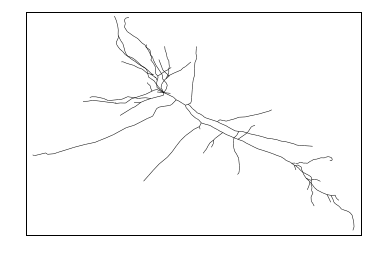

In [131]:
from pylab import *
f, ax = plt.subplots()
ax.set_axis_off()
Feature_neuron = McNeuron.Neuron(file_format = 'swc', input_file=L[2809])
rec1 = Rectangle((0,0) ,1,1 ,linewidth = 1 ,fill = False) 
l = plot_2D(Feature_neuron, give_image=True,  line_width = .5, scale_on = True, 
            scale = (.96,.96), translation=(.02,.02))
rec1.set_clip_on(False)
rec1 = ax.add_patch(rec1) 
ax.add_collection(l[0])
plt.savefig("/Volumes/Arch/Dropbox/MCMC paper/pipleline_generative_model_aribitray_neuron.eps", format = "eps",dpi=900)

## neuron from data

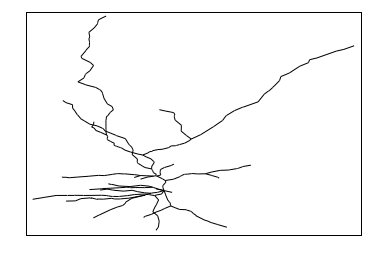

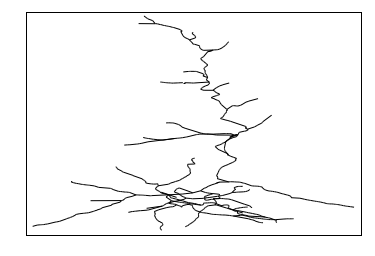

In [132]:
from pylab import *
f, ax = plt.subplots()
ax.set_axis_off()
Feature_neuron = McNeuron.Neuron(file_format = 'swc', input_file=L[2760])
rec1 = Rectangle((0,0) ,1,1 ,linewidth = 1 ,fill = False) 
l = plot_2D(Feature_neuron, give_image=True,  line_width = 1, scale_on = True, 
            scale = (.96,.96), translation=(.02,.02))
rec1.set_clip_on(False)
rec1 = ax.add_patch(rec1) 
ax.add_collection(l[0])
plt.savefig("/Volumes/Arch/Dropbox/MCMC paper/pipleline_generative_model_data2.eps", format = 'eps', dpi=900)

from pylab import *
f, ax = plt.subplots()
ax.set_axis_off()
Feature_neuron = McNeuron.Neuron(file_format = 'swc', input_file=L[2710])
rec1 = Rectangle((0,0) ,1,1 ,linewidth = 1 ,fill = False) 
l = plot_2D(Feature_neuron, give_image=True,  line_width = 1, scale_on = True, 
            scale = (.96,.96), translation=(.02,.02))
rec1.set_clip_on(False)
rec1 = ax.add_patch(rec1) 
ax.add_collection(l[0])
plt.savefig("/Volumes/Arch/Dropbox/MCMC paper/pipleline_generative_model_data1.eps", format = 'eps', dpi=900)

## diagram of features for real data

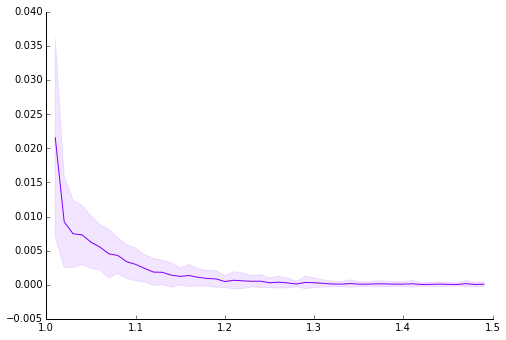

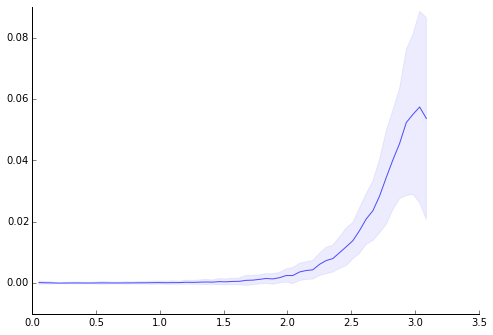

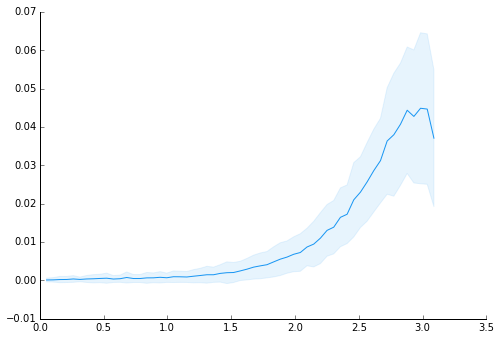

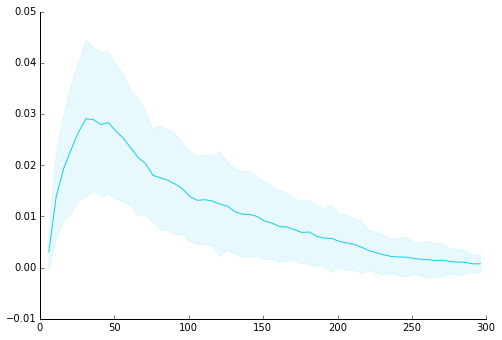

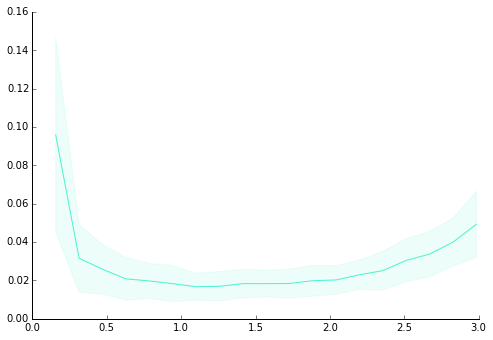

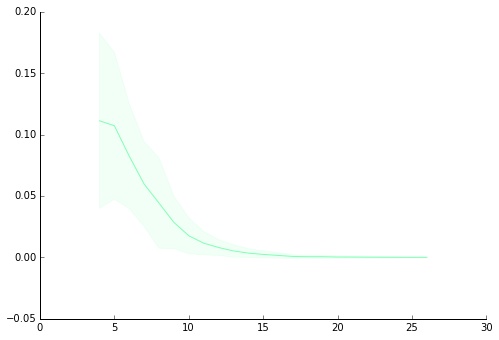

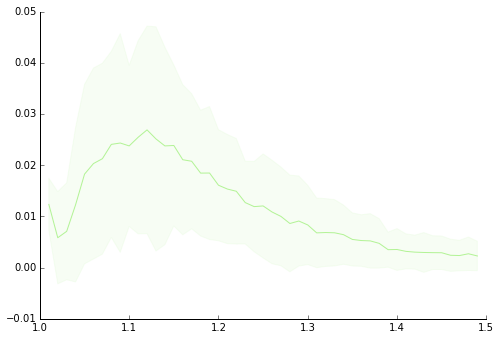

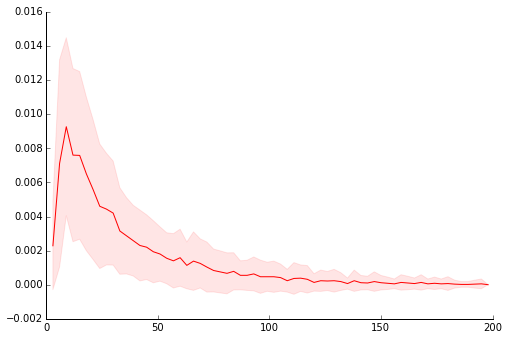

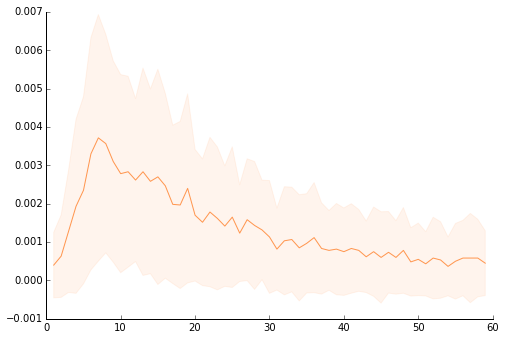

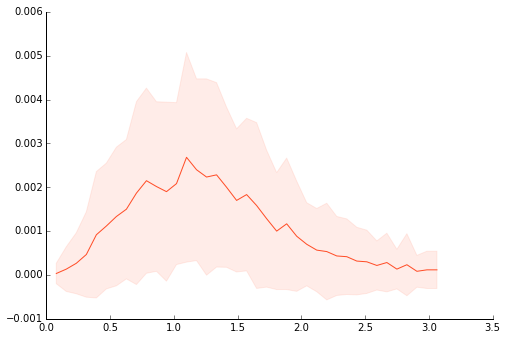

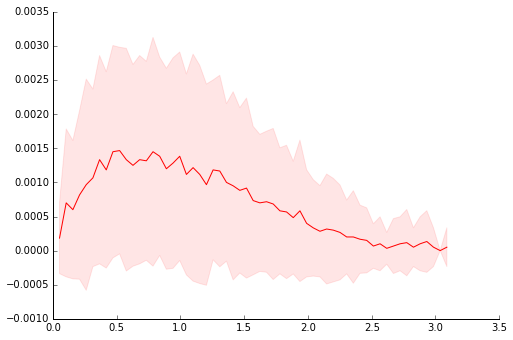

In [139]:
from matplotlib.pyplot import cm 
feature = get_features(N,all_range)
I = feature.keys()
c=cm.rainbow(np.linspace(0,1,len(I)))
c[7] = c[10]
for i in range(len(I)):
    f, axs = plt.subplots()
    f.set_figheight(5.5)
    f.set_figwidth(8)
    f.set_dpi(400)
    d = feature[I[i]]
    m = np.mean(d/600,axis = 0)
    std = np.std(d/600,axis = 0)
    x = all_range[I[i]][1:]
    axs.fill_between(x , y1 = m+std, y2 = m-std, alpha = .1, color = c[i])
    axs.plot(x,m, color = c[i])
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    axs.xaxis.set_ticks_position('bottom')
    axs.yaxis.set_ticks_position('left')
    #axs.set_title(title[I[i]], fontsize = 15)
    #axs.set_xlabel(xlabel[I[i]], fontsize = 15)
    #axs.set_ylabel(ylabel[I[i]], fontsize = 15)
    plt.savefig("/Volumes/Arch/Dropbox/MCMC paper/pipleline_generative_model_"+"real_data"+str(title[I[i]])+".eps", format='eps')

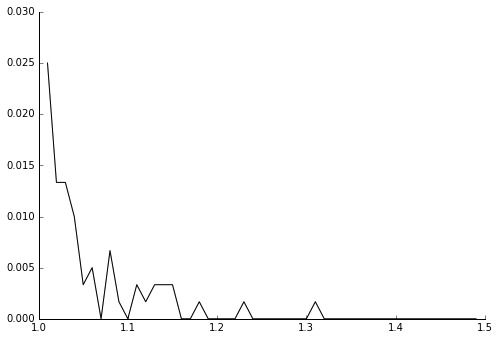

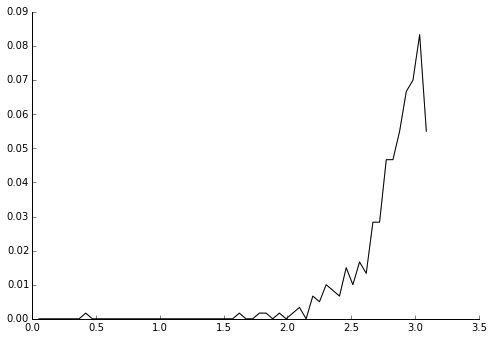

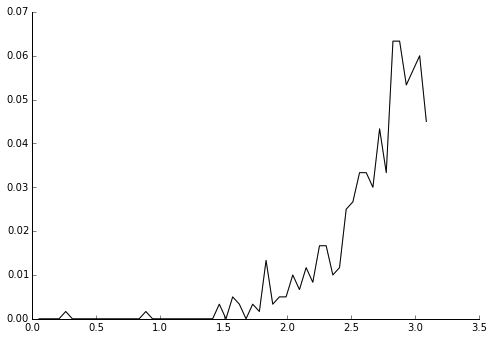

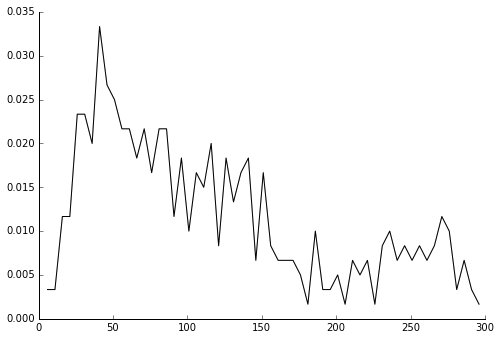

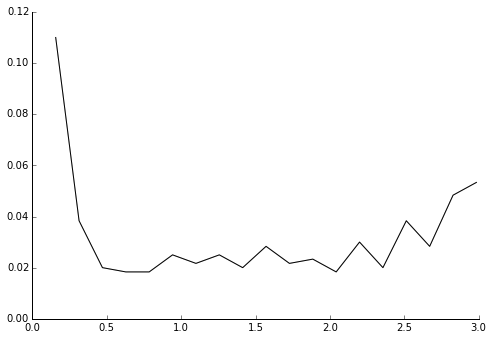

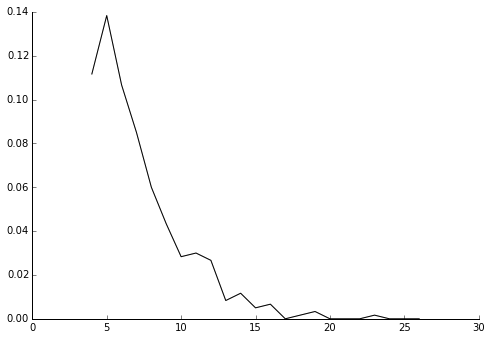

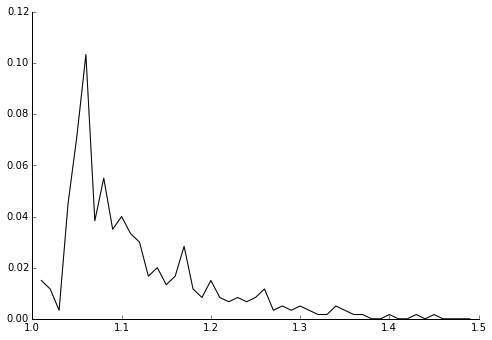

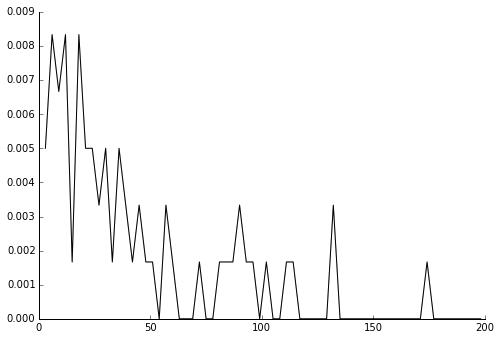

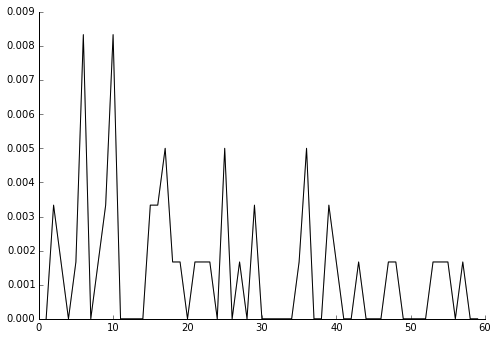

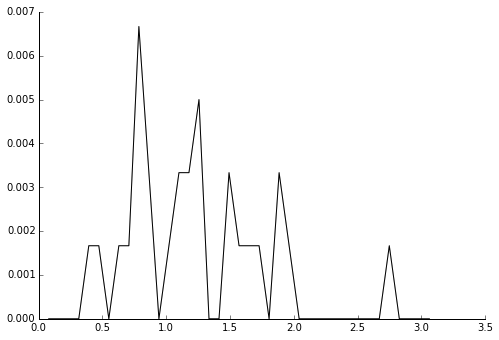

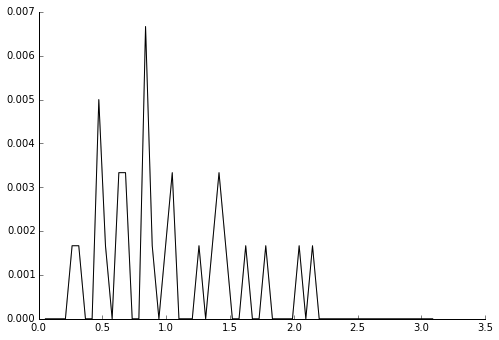

In [138]:
from matplotlib.pyplot import cm 
feature1 = get_features([McNeuron.Neuron(file_format = 'swc', input_file=L[2809])],all_range)
I = feature1.keys()
c=cm.rainbow(np.linspace(0,1,len(I)))
c[7] = c[10]
for i in range(len(I)):
    f, axs = plt.subplots()
    f.set_figheight(5.5)
    f.set_figwidth(8)
    f.set_dpi(400)
    d = feature1[I[i]]
    m = np.mean(d/600,axis = 0)
    std = np.std(d/1500,axis = 0)
    x = all_range[I[i]][1:]
    axs.fill_between(x , y1 = m+std, y2 = m-std, alpha = .1, color = 'k')
    axs.plot(x,m, color = 'k')
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    axs.xaxis.set_ticks_position('bottom')
    axs.yaxis.set_ticks_position('left')
    #axs.set_title(title[I[i]], fontsize = 15)
    #axs.set_xlabel(xlabel[I[i]], fontsize = 15)
    #axs.set_ylabel(ylabel[I[i]], fontsize = 15)
    plt.savefig("/Volumes/Arch/Dropbox/MCMC paper/pipleline_generative_model_"+"aribitrary_neuron"+str(title[I[i]])+".eps", format='eps', dpi = 400)

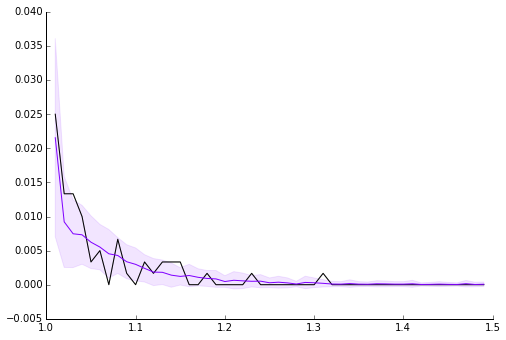

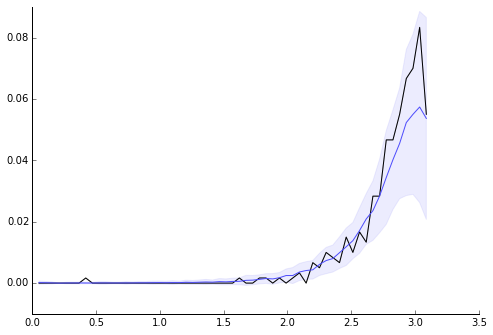

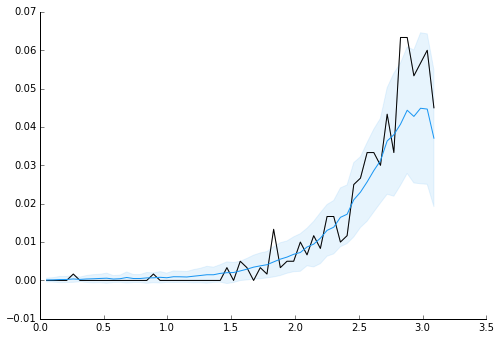

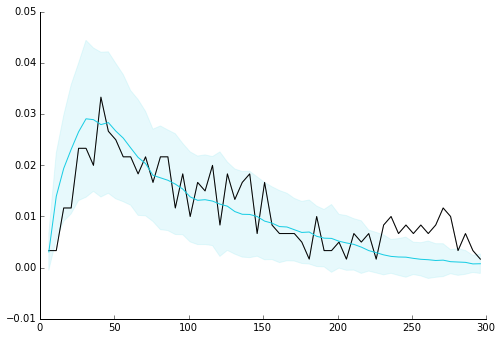

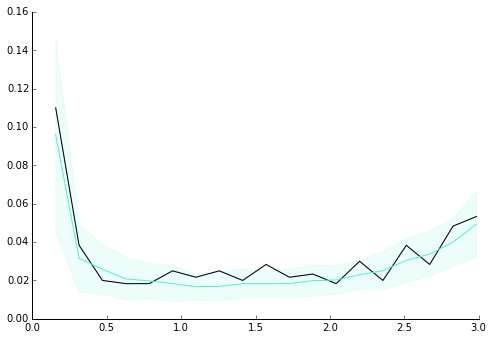

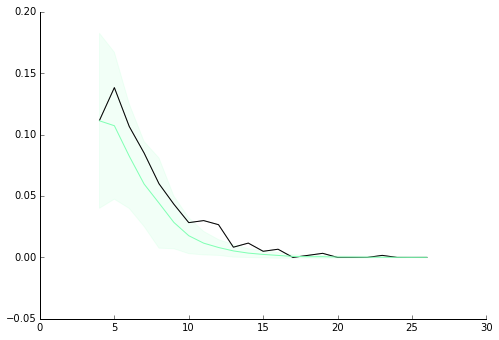

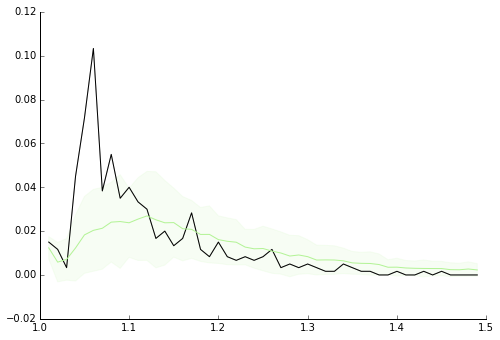

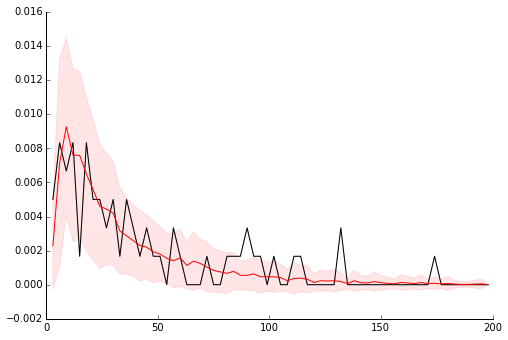

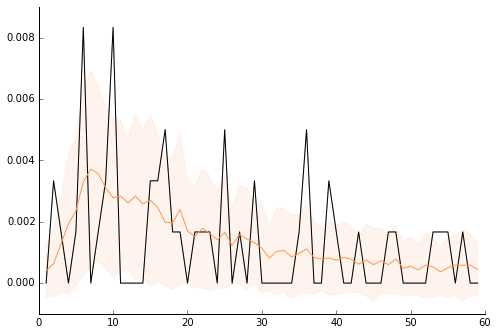

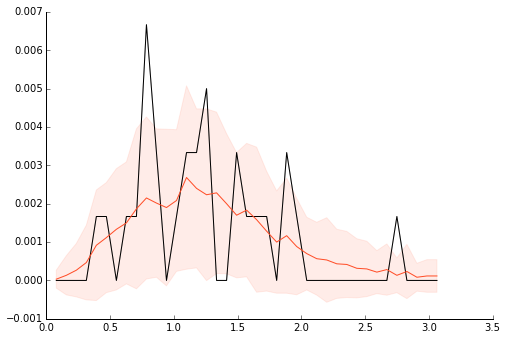

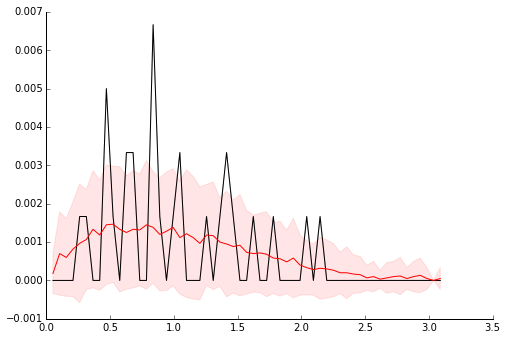

In [137]:
from matplotlib.pyplot import cm 
feature1 = get_features([McNeuron.Neuron(file_format = 'swc', input_file=L[2809])],all_range)
feature2 = get_features(N,all_range)
I = feature1.keys()
c=cm.rainbow(np.linspace(0,1,len(I)))
c[7] = c[10]
for i in range(len(I)):
    f, axs = plt.subplots()
    f.set_figheight(5.5)
    f.set_figwidth(8)
    f.set_dpi(400)
    d = feature1[I[i]]
    m = np.mean(d/600,axis = 0)
    std = np.std(d/1500,axis = 0)
    x = all_range[I[i]][1:]
    axs.fill_between(x , y1 = m+std, y2 = m-std, alpha = .1, color = 'k')
    axs.plot(x,m, color = 'k')
    
    d = feature2[I[i]]
    m = np.mean(d/600,axis = 0)
    std = np.std(d/600,axis = 0)
    x = all_range[I[i]][1:]
    axs.fill_between(x , y1 = m+std, y2 = m-std, alpha = .1, color = c[i])
    axs.plot(x,m, color = c[i])
    
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    axs.xaxis.set_ticks_position('bottom')
    axs.yaxis.set_ticks_position('left')
    #axs.set_title(title[I[i]], fontsize = 15)
    #axs.set_xlabel(xlabel[I[i]], fontsize = 15)
    #axs.set_ylabel(ylabel[I[i]], fontsize = 15)
    plt.savefig("/Volumes/Arch/Dropbox/MCMC paper/pipleline_generative_model_"+"overall"+str(title[I[i]])+".eps", format='eps', dpi = 400)

# pipeline mcmc

## sample neuron

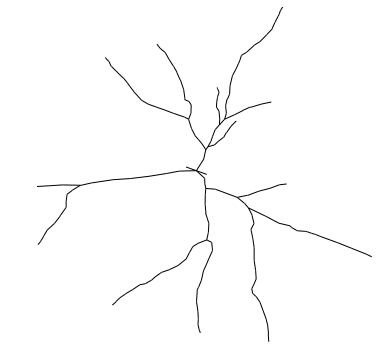

In [144]:
import numpy as np
import McNeuron
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline
L = McNeuron.visualize.get_all_path("/Volumes/Arch/Projects/Computational Anatomy/neuron_nmo/")
Neuron = McNeuron.Neuron(file_format = 'swc', input_file=L[676])
plot_2D(Feature_neuron, save = "/Volumes/Arch/Dropbox/MCMC paper/pipeline_mcmc_neuron.eps")

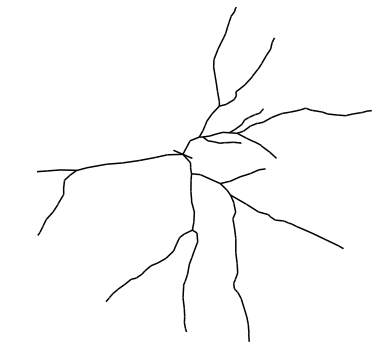

In [145]:
neuron = deepcopy(Neuron)
matrix = np.eye(3)
t = -1
matrix[0:2,0:2] = np.array([[np.cos(t), -np.sin(t)],[np.sin(t), np.cos(t)]])
node = neuron.get_random_no_soma_node()
inde = neuron.get_index_for_no_soma_node(node)
inde = 4
node = neuron.nodes_list[inde]
neuron.rotate(node, matrix)
start = inde
l = plot_2D(neuron, line_width = line_width, save = "/Volumes/Arch/Dropbox/MCMC paper/pipeline_mcmc_neuron_afterperturbation.eps")

# Generated Neurons

In [ ]:
import numpy as np
import McNeuron
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline
L = McNeuron.visualize.get_all_path("/Volumes/Arch/Projects/Computational Anatomy/neuron_nmo/")
Feature_neuron = McNeuron.Neuron(file_format = 'swc', input_file=L[1500])
feature_neuron = Feature_neuron.subsample_given_n_node(600)
Start_neuron = McNeuron.Neuron(file_format = 'swc', input_file=L[1020])
Start_neuron.location *= 9
Start_neuron.set_nodes_values()
Start_neuron = McNeuron.Neuron(file_format = 'only list of nodes', input_file = deepcopy(Start_neuron.nodes_list))
start_neuron = Start_neuron.subsample_given_n_node(600)

In [ ]:
per = McNeuron.Perturbation(neuron=deepcopy(start_neuron), iterations = 12000,verbose=0)
M = {'hist_range': {
    'Nbranch': np.array([1]),
    'branch_angle': np.arange(0,np.pi,np.pi/10),
    'distance_from_root': np.append(np.arange(1,1500,3),2000),
    'global_angle': np.arange(0,np.pi,np.pi/20),
    'distance_from_parent': np.append(np.arange(5,35,2),50),
    'local_angle': np.arange(0,np.pi,np.pi/20),
    'initial_segments': np.array([1]),
    'discrepancy_space': np.array([1]),
    'curvature' : np.arange(0,np.pi,np.pi/20),
    'ratio_euclidian_neuronal': np.append(np.arange(1,3,.01),np.arange(3,40,3)),
    'neural_important' : np.arange(0,600,10),
    'ratio_neural_euclidian_important' : np.arange(1,3,.01)
    },
    'hist_variance': {
    'Nbranch': 5,
    'branch_angle': 3,
    'distance_from_root': .02,
    'global_angle': .5,
    'distance_from_parent': 1,
    'local_angle': .3,
    'initial_segments': 1,
    'discrepancy_space': 1,
    'curvature' : 1,
    'ratio_euclidian_neuronal': .1 ,
    'neural_important' : 1,
    'ratio_neural_euclidian_important' : .1      
    }}
L_prob = {
     'extension/reduction': 0.,
     'extension/reduction end points': 0.,
     'add/remove' : 0.,
     'rescale toward end' : 0,
     'diameter' : 0.,
     'diameter_toward' : 0. ,
     'rotation for any node' : 0.1,
     'rotation for branching' : .2,
     'location toward end' : 0,
     'location' : 0,
     'sliding general' : 0.01,
     'sliding certain in distance' : .2,
     'sliding for branching node' : 0.05,
     'stretching vertical' : .2,
     'stretching horizental' : .2}

per.kappa_rotation = 200.
per.set_ratio_red_to_ext(.1)
per.rescale_value = 0
per.sliding_limit = 50.
per.horizental_stretch = .05
per.vertical_stretch = .05
per.location_toward_cte = .5
per.set_real_neuron(feature_neuron,M)
per.set_probability(L_prob)
# per.fit()
# gen = per.neuron
# McNeuron.visualize.plot_2D(gen,dpi = 120, line_width=2,size = 6);
# per.show_perturbation(1,14,6)
# per.neuron.show_features(15,17,20)

In [ ]:
plot_2D(per.neuron, background = 1, show_width = False, show_depth = False , size = 8, dpi = 300,
            line_width = 2.5,
           save = "/Volumes/Arch/Dropbox/MCMC paper/generated_3")

# Set of perturbations

## select the neuron

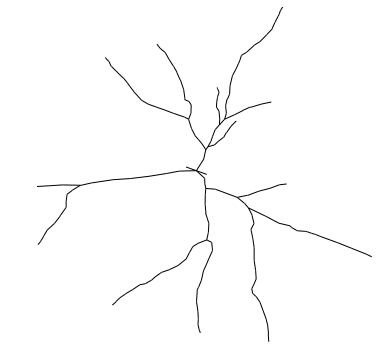

In [143]:
import numpy as np
import McNeuron
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline
L = McNeuron.visualize.get_all_path("/Volumes/Arch/Projects/Computational Anatomy/neuron_nmo/")
Feature_neuron = McNeuron.Neuron(file_format = 'swc', input_file=L[676])
plot_2D(Feature_neuron)

## put all the perturbation beside of each other

/Users/RoozbehFarhoudi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:70: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/RoozbehFarhoudi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:71: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
McNeuron/Neuron.py:1166: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  (J,) = np.where(~np.isnan(self.connection[:,i]))
McNeuron/Neuron.py:1167: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.connection[J,i] = self.distance_from_parent[i]
McNeuron/Neuron.py:1422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = self.nodes_list[I[i]]
McNeuron/Neuron.py:1441: VisibleDeprecationWarning

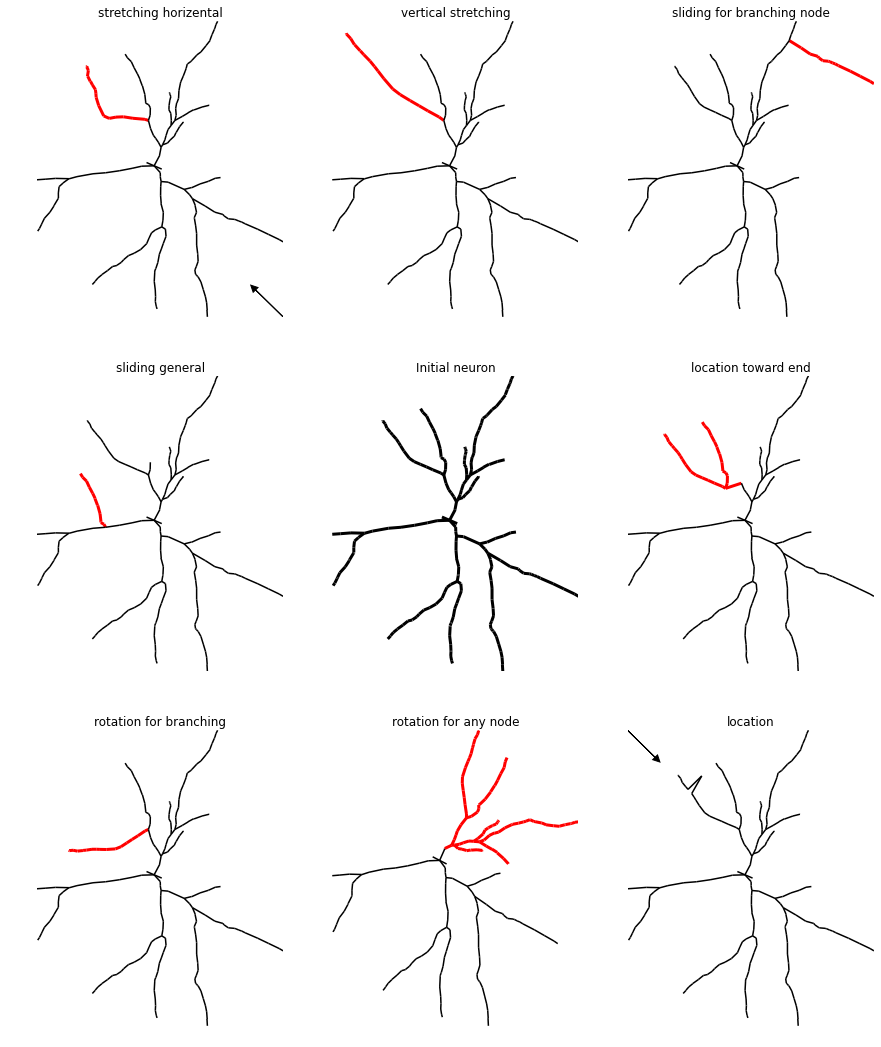

In [141]:
Neuron = Feature_neuron
f, ax = plt.subplots(3,3)
f.set_figheight(18)
f.set_figwidth(15)
f.set_dpi(400)
line_width = 1.5
# draw initial neuron
l = plot_2D(deepcopy(Neuron), give_image=True, line_width = 2*line_width)
ax[1,1].add_collection(l[0])
ax[1,1].set_xlim(l[1])
ax[1,1].set_ylim(l[2])
ax[1,1].set_axis_off()
#ax[1,1].set_title("Initial neuron")

# stretching horizental
neuron = deepcopy(Neuron)
(branch_index,)  = np.where(neuron.branch_order==2)
(end_nodes,)  = np.where(neuron.branch_order==0)
nodes = np.append(branch_index,end_nodes)
parents = neuron.parent_index_for_node_subset(nodes)
n = 16
p = 2.5
node_index = nodes[n]
parent_index = parents[n]
neuron.horizental_stretch(node_index, parent_index, p)
start = neuron.child_index[0,parents[n]]
l = plot_2D(neuron, give_image=True, red_after=True, node_red = start, line_width = line_width)
ax[0,0].add_collection(l[0])
ax[0,0].add_collection(l[1])
ax[0,0].set_xlim(l[2])
ax[0,0].set_ylim(l[3])
ax[0,0].set_axis_off()
#ax[0,0].arrow(l[2][1],l[3][0] ,  -20,  20, head_width=5, head_length=5, fc='k', ec='k')
#ax[0,0].set_title("stretching horizental")

# vertical_stretching
neuron = deepcopy(Neuron)
(branch_index,)  = np.where(neuron.branch_order==2)
(end_nodes,)  = np.where(neuron.branch_order==0)
nodes = np.append(branch_index,end_nodes)
parents = neuron.parent_index_for_node_subset(nodes)
n = 16
p = 1.6
node_index = nodes[n]
parent_index = parents[n]
neuron.vertical_stretch(node_index, parent_index, p)
start = neuron.child_index[0,parents[n]]
l = plot_2D(neuron, give_image=True, red_after=True, node_red = start, line_width = line_width)
ax[0,1].add_collection(l[0])
ax[0,1].add_collection(l[1])
ax[0,1].set_xlim(l[2])
ax[0,1].set_ylim(l[3])
ax[0,1].set_axis_off()
#ax[0,1].set_title("vertical stretching")

# sliding for branching node
neuron = deepcopy(Neuron)
branch_node = neuron.get_random_branching_node()
child = branch_node.children[0]
child_of_branching_node_index = neuron.get_index_for_no_soma_node(child)
(I,) = np.where(~ np.isnan(neuron.connection[:, child_of_branching_node_index]))
I = np.append(I, neuron.get_index_for_no_soma_node(branch_node))
order_one_node = neuron.get_random_order_one_node_not_in_certain_index(I)
order_one_node_index = neuron.get_index_for_no_soma_node(order_one_node)
child_of_branching_node_index = 122
order_one_node_index = 42
neuron.slide(child_of_branching_node_index, order_one_node_index)
start = neuron.child_index[1,order_one_node_index]
l = plot_2D(neuron, give_image=True, red_after=True, node_red = start, line_width = line_width)
ax[0,2].add_collection(l[0])
ax[0,2].add_collection(l[1])
ax[0,2].set_xlim(l[2])
ax[0,2].set_ylim(l[3])
ax[0,2].set_axis_off()
#ax[0,2].set_title("sliding for branching node")

# sliding general
neuron = deepcopy(Neuron)
cutting_node = neuron.get_random_no_soma_node()
cutting_node_index = neuron.get_index_for_no_soma_node(cutting_node)
(I,) = np.where(~ np.isnan(neuron.connection[:, cutting_node_index]))
attaching_node = neuron.get_random_non_branch_node_not_in_certain_index(I)
attaching_node_index = neuron.get_index_for_no_soma_node(attaching_node)
cutting_node_index = 99
attaching_node_index = 218
neuron.slide(cutting_node_index, attaching_node_index)
#print cutting_node_index
#print attaching_node_index
start = neuron.child_index[1,attaching_node_index]
l = plot_2D(neuron, give_image=True, red_after=True, node_red = start, line_width = line_width)
ax[1,0].add_collection(l[0])
ax[1,0].add_collection(l[1])
ax[1,0].set_xlim(l[2])
ax[1,0].set_ylim(l[3])
ax[1,0].set_axis_off()
#ax[1,0].set_title("sliding general")

# location toward end
neuron = deepcopy(Neuron)
index = neuron.choose_random_node_index()
displace = np.array([-10,-10,3])
index = 76
neuron.change_location_toward_end_nodes(index,displace)
start = index
l = plot_2D(neuron, give_image=True, red_after=True, node_red = start, line_width = line_width)
ax[1,2].add_collection(l[0])
ax[1,2].add_collection(l[1])
ax[1,2].set_xlim(l[2])
ax[1,2].set_ylim(l[3])
ax[1,2].set_axis_off()
#ax[1,2].set_title("location toward end")

# rotation for branching
neuron = deepcopy(Neuron)
node = neuron.get_random_branching_node()
inde = neuron.get_index_for_no_soma_node(node)
#print inde
inde = 76
node = neuron.nodes_list[inde]
node = node.children[0]
matrix = np.eye(3)
t = 1
matrix[0:2,0:2] = np.array([[np.cos(t), -np.sin(t)],[np.sin(t), np.cos(t)]])
neuron.rotate_from_branch(node, matrix)
start = neuron.child_index[0,inde]
l = plot_2D(neuron, give_image=True, red_after=True, node_red = start, line_width = line_width)
ax[2,0].add_collection(l[0])
ax[2,0].add_collection(l[1])
ax[2,0].set_xlim(l[2])
ax[2,0].set_ylim(l[3])
ax[2,0].set_axis_off()
#ax[2,0].set_title("rotation for branching")

# rotation for any node
neuron = deepcopy(Neuron)
matrix = np.eye(3)
t = -1
matrix[0:2,0:2] = np.array([[np.cos(t), -np.sin(t)],[np.sin(t), np.cos(t)]])
node = neuron.get_random_no_soma_node()
inde = neuron.get_index_for_no_soma_node(node)
#print inde
inde = 4
node = neuron.nodes_list[inde]
neuron.rotate(node, matrix)
start = inde
l = plot_2D(neuron, give_image=True, red_after=True, node_red = start, line_width = line_width)
ax[2,1].add_collection(l[0])
ax[2,1].add_collection(l[1])
ax[2,1].set_xlim(l[2])
ax[2,1].set_ylim(l[3])
ax[2,1].set_axis_off()
ax[2,1].arrow(0,l[2][1],  0,  20, head_width=5, head_length=5, fc='k', ec='k')
#ax[2,1].set_title("rotation for any node")

# location
neuron = deepcopy(Neuron)
index = neuron.choose_random_node_index()
#print index
index = 88
displace = np.array([10,10,0])
neuron.change_location(index,displace)
l = plot_2D(neuron, give_image=True, line_width = line_width)
ax[2,2].add_collection(l[0])
ax[2,2].set_xlim(l[1])
ax[2,2].set_ylim(l[2])
ax[2,2].set_axis_off()
#ax[2,2].set_title("location")
#ax[2,2].arrow(l[1][0],l[2][1],  20, - 20, head_width=5, head_length=5, fc='k', ec='k')
plt.draw()
plt.savefig("/Volumes/Arch/Dropbox/MCMC paper/perturbation.eps", format = "eps")

# Generated images

## sample of data

In [ ]:
from pylab import *
real_neuron_sample =2
border = 0
border_x = .01
border_y = .01
dpi = 100
# Sample of the data of pyramidal
L = McNeuron.visualize.get_all_path("/Volumes/Arch/Projects/Computational Anatomy/neuron_nmo/")
f, ax = plt.subplots()
ax.set_axis_off()
golden = 1
for i in range(real_neuron_sample):
    Feature_neuron = McNeuron.Neuron(file_format = 'swc', input_file=L[1500+i])
    res1 = (1. - (2 * real_neuron_sample+1) * border_x - 2*real_neuron_sample*border_x)/((1.+real_neuron_sample) * golden)
    rec1 = Rectangle(((2*i+1)*border_x + 2*i*border_x+ golden*res1*i , 1 - res1*golden  - border - 2*border_y)
                     ,res1*golden + 2*border_x
                     ,res1 + 2*border_y
                     ,fill = False)  
    l = plot_2D(Feature_neuron, dpi = dpi, give_image=True,  line_width = 1, scale_on = True, 
                scale = (res1*golden, res1), 
                translation=((2*i+2)*border_x + 2*i*border_x + golden*res1*i,1 - res1*golden - border_y - border))
    rec1.set_clip_on(False)
    rec1 = ax.add_patch(rec1) 
    ax.add_collection(l[0])

# generated data of Pyramidal
L = McNeuron.visualize.get_all_path("/Users/RoozbehFarhoudi/Documents/Repos/Generative-Models-of-Neuron-Morphology/Data/Interneuron/allen cell types/CNG version/")
border = .3
golden = (1+np.sqrt(3))/2
for i in range(real_neuron_sample):
    Feature_neuron = McNeuron.Neuron(file_format = 'swc', input_file=L[6+i])
    res1 = (1. - (2 * real_neuron_sample+1) * border_x - 2*real_neuron_sample*border_x)/((1.+real_neuron_sample) * golden)
    rec1 = Rectangle(((2*i+1)*border_x + 2*i*border_x+ golden*res1*i , 1 - res1*golden  - border - 2*border_y)
                     ,res1*golden + 2*border_x
                     ,res1 + 2*border_y
                     ,fill = False)  
    l = plot_2D(Feature_neuron, dpi = dpi, give_image=True,  line_width = 1, scale_on = True, 
                scale = (res1*golden, res1), 
                translation=((2*i+2)*border_x + 2*i*border_x + golden*res1*i,1 - res1*golden - border_y - border))
    rec1.set_clip_on(False)
    rec1 = ax.add_patch(rec1) 
    ax.add_collection(l[0])
f.set_figheight(30)
f.set_figwidth(30)
f.set_dpi(dpi)
#plt.savefig("/Volumes/Arch/Dropbox/MCMC paper/generated_fig")

# Evolution of the neuron

In [ ]:
from pylab import *
N = [deepcopy(start_neuron)]
it = 1000
per = McNeuron.Perturbation(neuron=deepcopy(start_neuron), iterations = it,verbose=0)
N.append(deepcopy(per.neuron))
per.kappa_rotation = 200.
per.rescale_value = 0
per.sliding_limit = 80.
per.horizental_stretch = .1
per.vertical_stretch = .1
per.location_toward_cte = .5
per.set_real_neuron(feature_neuron,M)
per.set_probability(L_prob)
per.fit()
N.append(deepcopy(per.neuron))

neuron_sample = 15
for i in range(neuron_sample):
    per.set_initial_neuron(deepcopy(per.neuron))
    per.set_n_iteration(it)
    per.fit()
    N.append(deepcopy(per.neuron))

border = 0
border_x = .01
border_y = .01
dpi = 80
f, ax = plt.subplots(figsize=(20, 20))
ax.set_axis_off()
golden = 1
n = neuron_sample+2
s = 4
le = 5.
for j in range(s):
    border +=.1
    for i in range(np.int(n/s)+1):
        if(s*j+i<n):
            neuron = N[s*j+i]
            res1 = (le - (2 * neuron_sample+1) * border_x - 2*neuron_sample*border_x)/((1.+neuron_sample) * golden*5)
            rec1 = Rectangle(((2*i+1)*border_x + 2*i*border_x+ golden*res1*i , 1 - res1*golden  - border - 2*border_y)
                             ,res1*golden + 2*border_x
                             ,res1 + 2*border_y
                             ,fill = False)  
            l = plot_2D(neuron, dpi = dpi, give_image=True,  line_width = 1, scale_on = True, 
                        scale = (res1*golden, res1), 
                        translation=((2*i+2)*border_x + 2*i*border_x + golden*res1*i,1 - res1*golden - border_y - border))
            rec1.set_clip_on(False)
            rec1 = ax.add_patch(rec1) 
            ax.add_collection(l[0])
f.set_dpi(300)
plt.savefig("/Volumes/Arch/Dropbox/MCMC paper/evolution")
#f.set_size_inches((80,80))
#f.set_figheight(50)
#f.set_figwidth(50)

In [ ]:
for i in range(len(N)):
    plot_2D(N[i])